In [2]:
import torch 
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

Epoch [1/200], Training Loss: 0.3834
Epoch [1/200], Validation Loss: 0.6119
Epoch [2/200], Training Loss: 0.3208
Epoch [2/200], Validation Loss: 0.5595
Epoch [3/200], Training Loss: 0.2847
Epoch [3/200], Validation Loss: 0.5220
Epoch [4/200], Training Loss: 0.2607
Epoch [4/200], Validation Loss: 0.4919
Epoch [5/200], Training Loss: 0.2442
Epoch [5/200], Validation Loss: 0.4672
Epoch [6/200], Training Loss: 0.2311
Epoch [6/200], Validation Loss: 0.4453
Epoch [7/200], Training Loss: 0.2197
Epoch [7/200], Validation Loss: 0.4263
Epoch [8/200], Training Loss: 0.2104
Epoch [8/200], Validation Loss: 0.4090
Epoch [9/200], Training Loss: 0.2021
Epoch [9/200], Validation Loss: 0.3934
Epoch [10/200], Training Loss: 0.1945
Epoch [10/200], Validation Loss: 0.3793
Epoch [11/200], Training Loss: 0.1879
Epoch [11/200], Validation Loss: 0.3664
Epoch [12/200], Training Loss: 0.1825
Epoch [12/200], Validation Loss: 0.3545
Epoch [13/200], Training Loss: 0.1769
Epoch [13/200], Validation Loss: 0.3437
Epoc

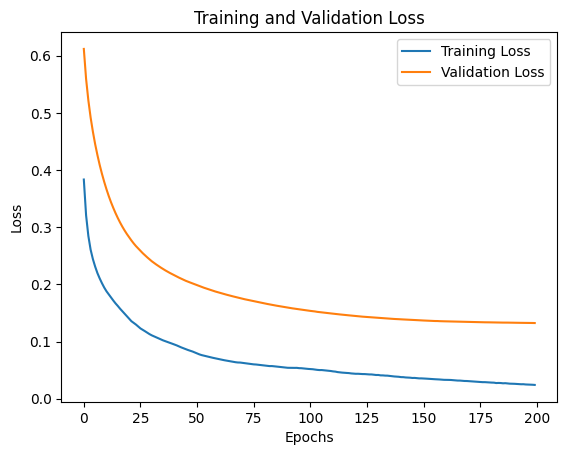

In [2]:


trainData = pd.read_csv('./csv/cure_the_princess_train.csv')
validData = pd.read_csv('./csv/cure_the_princess_validation.csv')


trainX = trainData.drop(columns=['Cured']).values
trainY = trainData['Cured'].values
validX = validData.drop(columns=['Cured']).values
validY = validData['Cured'].values


numInputFeatures = trainX.shape[1]

torch.manual_seed(190401070)


class MLP(nn.Module):
    def __init__(self, numInputFeatures):
        super().__init__()
        self.fc1 = nn.Linear(numInputFeatures, 100) 
        self.relu1 = nn.ReLU() 
        self.fc2 = nn.Linear(100, 50) 
        self.relu2 = nn.ReLU() 
        self.fc3 = nn.Linear(50, 1) 
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = MLP(numInputFeatures=numInputFeatures)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0006)


numEpochs = 200
batchSize = 16
trainLosses = []
validLosses = []
for epoch in range(numEpochs):
    for i in range(0, len(trainX), batchSize):
        
        batchX = torch.tensor(trainX[i:i+batchSize], dtype=torch.float32)
        batchY = torch.tensor(trainY[i:i+batchSize], dtype=torch.float32).view(-1, 1)
        
        
        outputs = model(batchX)
        loss = criterion(outputs, batchY)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    trainLosses.append(loss.item())
    print('Epoch [%d/%d], Training Loss: %.4f' % (epoch+1, numEpochs, loss.item()))
    
   
    validLoss = criterion(model(torch.tensor(validX, dtype=torch.float32)), torch.tensor(validY, dtype=torch.float32).view(-1, 1)).item()
    validLosses.append(validLoss)
    print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, numEpochs, validLoss))
    


plt.plot(trainLosses, label='Training Loss')
plt.plot(validLosses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch [1/250], Training Loss: 0.3834
Epoch [1/250], Validation Loss: 0.6119
Accuracy: 0.6749, Precision: 0.6367, Recall: 0.8222, F1: 0.7177
Epoch [2/250], Training Loss: 0.3208
Epoch [2/250], Validation Loss: 0.5595
Accuracy: 0.7176, Precision: 0.6687, Recall: 0.8686, F1: 0.7556
Epoch [3/250], Training Loss: 0.2847
Epoch [3/250], Validation Loss: 0.5220
Accuracy: 0.7513, Precision: 0.6984, Recall: 0.8892, F1: 0.7823
Epoch [4/250], Training Loss: 0.2607
Epoch [4/250], Validation Loss: 0.4919
Accuracy: 0.7707, Precision: 0.7149, Recall: 0.9046, F1: 0.7986
Epoch [5/250], Training Loss: 0.2442
Epoch [5/250], Validation Loss: 0.4672
Accuracy: 0.7902, Precision: 0.7325, Recall: 0.9175, F1: 0.8146
Epoch [6/250], Training Loss: 0.2311
Epoch [6/250], Validation Loss: 0.4453
Accuracy: 0.8018, Precision: 0.7443, Recall: 0.9227, F1: 0.8239
Epoch [7/250], Training Loss: 0.2197
Epoch [7/250], Validation Loss: 0.4263
Accuracy: 0.8187, Precision: 0.7616, Recall: 0.9304, F1: 0.8376
Epoch [8/250], Train

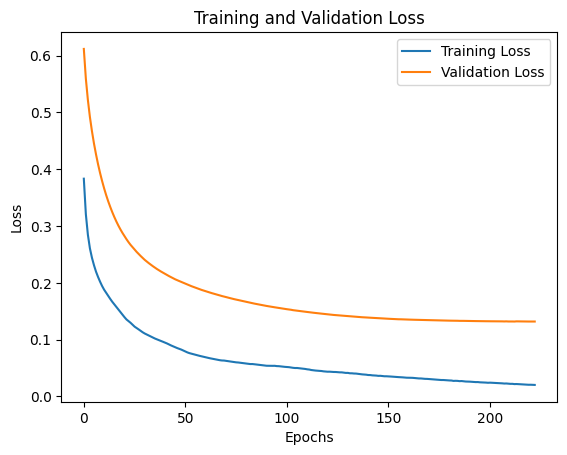

In [29]:
#early stopping accuracy precision recall f1 score eklendi

trainData = pd.read_csv('./csv/cure_the_princess_train.csv')
validData = pd.read_csv('./csv/cure_the_princess_validation.csv')
testData =  pd.read_csv('./csv/cure_the_princess_test.csv')


trainX = trainData.drop(columns=['Cured']).values
trainY = trainData['Cured'].values
validX = validData.drop(columns=['Cured']).values
validY = validData['Cured'].values
testX = testData.drop(columns=['Cured']).values
testY = testData['Cured'].values


numInputFeatures = trainX.shape[1]

torch.manual_seed(190401070)


class MLP(nn.Module):
    def __init__(self, numInputFeatures):
        super().__init__()
        self.fc1 = nn.Linear(numInputFeatures, 100) 
        self.relu1 = nn.ReLU() 
        self.fc2 = nn.Linear(100, 50) 
        self.relu2 = nn.ReLU() 
        self.fc3 = nn.Linear(50, 1) 
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = MLP(numInputFeatures=numInputFeatures)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0006)


numEpochs = 250
batchSize = 16
trainLosses = []
validLosses = []
bestValidLoss = None
patience = 10
counter = 0

for epoch in range(numEpochs):
    for i in range(0, len(trainX), batchSize):
        
        batchX = torch.tensor(trainX[i:i+batchSize], dtype=torch.float32)
        batchY = torch.tensor(trainY[i:i+batchSize], dtype=torch.float32).view(-1, 1)
        
        
        outputs = model(batchX)
        loss = criterion(outputs, batchY)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    trainLosses.append(loss.item())
    print('Epoch [%d/%d], Training Loss: %.4f' % (epoch+1, numEpochs, loss.item()))
    
   
    validLoss = criterion(model(torch.tensor(validX, dtype=torch.float32)), torch.tensor(validY, dtype=torch.float32).view(-1, 1)).item()
    validLosses.append(validLoss)
    print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, numEpochs, validLoss))

    if bestValidLoss is None or  validLoss < bestValidLoss:
        bestValidLoss = validLoss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!!!", epoch)
            break

    with torch.no_grad():
        testOutputs = model(torch.tensor(testX, dtype=torch.float32))
        testPredictions = (testOutputs > 0.5).float().view(-1)

        
        accuracy = (testPredictions == torch.tensor(testY, dtype=torch.float32)).float().mean().item()
        precision = (testPredictions[testPredictions == 1] == torch.tensor(testY[testPredictions == 1], dtype=torch.float32)).float().mean().item()
        recall = (testPredictions[testY == 1] == torch.tensor(testY[testY == 1], dtype=torch.float32)).float().mean().item()
        f1 = 2 * precision * recall / (precision + recall)
        print('Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1: %.4f' % (accuracy, precision, recall, f1))

   

plt.plot(trainLosses, label='Training Loss')
plt.plot(validLosses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# early stopping kısmını olmadan aşağıdaki kodu colab gpu ve cpusunda çalıştırıp sonuçları karşılaştırdım.

import time 

startTime = time.time()

trainData = pd.read_csv('./csv/cure_the_princess_train.csv')
validData = pd.read_csv('./csv/cure_the_princess_validation.csv')
testData =  pd.read_csv('./csv/cure_the_princess_test.csv')


trainX = trainData.drop(columns=['Cured']).values
trainY = trainData['Cured'].values
validX = validData.drop(columns=['Cured']).values
validY = validData['Cured'].values
testX = testData.drop(columns=['Cured']).values
testY = testData['Cured'].values


numInputFeatures = trainX.shape[1]

torch.manual_seed(190401070)


class MLP(nn.Module):
    def __init__(self, numInputFeatures):
        super().__init__()
        self.fc1 = nn.Linear(numInputFeatures, 100) 
        self.relu1 = nn.ReLU() 
        self.fc2 = nn.Linear(100, 50) 
        self.relu2 = nn.ReLU() 
        self.fc3 = nn.Linear(50, 1) 
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = MLP(numInputFeatures=numInputFeatures)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0006)


numEpochs = 250
batchSize = 16
trainLosses = []
validLosses = []


for epoch in range(numEpochs):
    for i in range(0, len(trainX), batchSize):
        
        batchX = torch.tensor(trainX[i:i+batchSize], dtype=torch.float32)
        batchY = torch.tensor(trainY[i:i+batchSize], dtype=torch.float32).view(-1, 1)
        
        
        outputs = model(batchX)
        loss = criterion(outputs, batchY)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    trainLosses.append(loss.item())
    print('Epoch [%d/%d], Training Loss: %.4f' % (epoch+1, numEpochs, loss.item()))
    
   
    validLoss = criterion(model(torch.tensor(validX, dtype=torch.float32)), torch.tensor(validY, dtype=torch.float32).view(-1, 1)).item()
    validLosses.append(validLoss)
    print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, numEpochs, validLoss))

    

    with torch.no_grad():
        testOutputs = model(torch.tensor(testX, dtype=torch.float32))
        testPredictions = (testOutputs > 0.5).float().view(-1)

        
        accuracy = (testPredictions == torch.tensor(testY, dtype=torch.float32)).float().mean().item()
        precision = (testPredictions[testPredictions == 1] == torch.tensor(testY[testPredictions == 1], dtype=torch.float32)).float().mean().item()
        recall = (testPredictions[testY == 1] == torch.tensor(testY[testY == 1], dtype=torch.float32)).float().mean().item()
        f1 = 2 * precision * recall / (precision + recall)
        print('Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1: %.4f' % (accuracy, precision, recall, f1))

endTime = time.time()

print("Time: ", endTime - startTime)

plt.plot(trainLosses, label='Training Loss')
plt.plot(validLosses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()





Epoch [1/4500], Training Loss: 0.3834
Epoch [1/4500], Validation Loss: 0.6119
Accuracy: 0.6749, Precision: 0.6367, Recall: 0.8222, F1: 0.7177
Epoch [2/4500], Training Loss: 0.3208
Epoch [2/4500], Validation Loss: 0.5595
Accuracy: 0.7176, Precision: 0.6687, Recall: 0.8686, F1: 0.7556
Epoch [3/4500], Training Loss: 0.2847
Epoch [3/4500], Validation Loss: 0.5220
Accuracy: 0.7513, Precision: 0.6984, Recall: 0.8892, F1: 0.7823
Epoch [4/4500], Training Loss: 0.2607
Epoch [4/4500], Validation Loss: 0.4919
Accuracy: 0.7707, Precision: 0.7149, Recall: 0.9046, F1: 0.7986
Epoch [5/4500], Training Loss: 0.2442
Epoch [5/4500], Validation Loss: 0.4672
Accuracy: 0.7902, Precision: 0.7325, Recall: 0.9175, F1: 0.8146
Epoch [6/4500], Training Loss: 0.2311
Epoch [6/4500], Validation Loss: 0.4453
Accuracy: 0.8018, Precision: 0.7443, Recall: 0.9227, F1: 0.8239
Epoch [7/4500], Training Loss: 0.2197
Epoch [7/4500], Validation Loss: 0.4263
Accuracy: 0.8187, Precision: 0.7616, Recall: 0.9304, F1: 0.8376
Epoch 

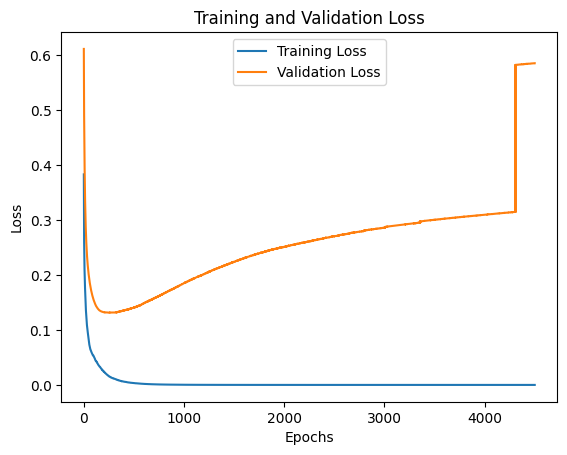

In [8]:
# overfit etmesi için epok sayısını arttırdım.
trainData = pd.read_csv('./csv/cure_the_princess_train.csv')
validData = pd.read_csv('./csv/cure_the_princess_validation.csv')
testData =  pd.read_csv('./csv/cure_the_princess_test.csv')


trainX = trainData.drop(columns=['Cured']).values
trainY = trainData['Cured'].values
validX = validData.drop(columns=['Cured']).values
validY = validData['Cured'].values
testX = testData.drop(columns=['Cured']).values
testY = testData['Cured'].values


numInputFeatures = trainX.shape[1]

torch.manual_seed(190401070)


class MLP(nn.Module):
    def __init__(self, numInputFeatures):
        super().__init__()
        self.fc1 = nn.Linear(numInputFeatures, 100) 
        self.relu1 = nn.ReLU() 
        self.fc2 = nn.Linear(100, 50) 
        self.relu2 = nn.ReLU() 
        self.fc3 = nn.Linear(50, 1) 
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = MLP(numInputFeatures=numInputFeatures)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0006)


numEpochs = 4500
batchSize = 16
trainLosses = []
validLosses = []
for epoch in range(numEpochs):
    for i in range(0, len(trainX), batchSize):
        
        batchX = torch.tensor(trainX[i:i+batchSize], dtype=torch.float32)
        batchY = torch.tensor(trainY[i:i+batchSize], dtype=torch.float32).view(-1, 1)
        
        
        outputs = model(batchX)
        loss = criterion(outputs, batchY)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    trainLosses.append(loss.item())
    print('Epoch [%d/%d], Training Loss: %.4f' % (epoch+1, numEpochs, loss.item()))
    
   
    validLoss = criterion(model(torch.tensor(validX, dtype=torch.float32)), torch.tensor(validY, dtype=torch.float32).view(-1, 1)).item()
    validLosses.append(validLoss)
    print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, numEpochs, validLoss))

    with torch.no_grad():
        testOutputs = model(torch.tensor(testX, dtype=torch.float32))
        testPredictions = (testOutputs > 0.5).float().view(-1)

        
        accuracy = (testPredictions == torch.tensor(testY, dtype=torch.float32)).float().mean().item()
        precision = (testPredictions[testPredictions == 1] == torch.tensor(testY[testPredictions == 1], dtype=torch.float32)).float().mean().item()
        recall = (testPredictions[testY == 1] == torch.tensor(testY[testY == 1], dtype=torch.float32)).float().mean().item()
        f1 = 2 * precision * recall / (precision + recall)
        print('Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1: %.4f' % (accuracy, precision, recall, f1))


plt.plot(trainLosses, label='Training Loss')
plt.plot(validLosses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch [1/250], Training Loss: 0.9308
Epoch [1/250], Validation Loss: 1.1868
Accuracy: 0.6736, Precision: 0.6735, Recall: 0.6804, F1: 0.6769
Epoch [2/250], Training Loss: 0.0206
Epoch [2/250], Validation Loss: 0.8198
Accuracy: 0.6697, Precision: 0.6602, Recall: 0.7062, F1: 0.6824
Epoch [3/250], Training Loss: 0.0526
Epoch [3/250], Validation Loss: 0.6563
Accuracy: 0.6852, Precision: 0.6817, Recall: 0.7010, F1: 0.6912
Epoch [4/250], Training Loss: 0.1583
Epoch [4/250], Validation Loss: 0.8176
Accuracy: 0.7267, Precision: 0.7007, Recall: 0.7964, F1: 0.7455
Epoch [5/250], Training Loss: 0.1271
Epoch [5/250], Validation Loss: 0.5947
Accuracy: 0.7396, Precision: 0.7111, Recall: 0.8119, F1: 0.7581
Epoch [6/250], Training Loss: 0.2902
Epoch [6/250], Validation Loss: 0.6447
Accuracy: 0.7474, Precision: 0.7188, Recall: 0.8170, F1: 0.7648
Epoch [7/250], Training Loss: 0.2741
Epoch [7/250], Validation Loss: 0.5903
Accuracy: 0.7759, Precision: 0.7722, Recall: 0.7861, F1: 0.7791
Epoch [8/250], Train

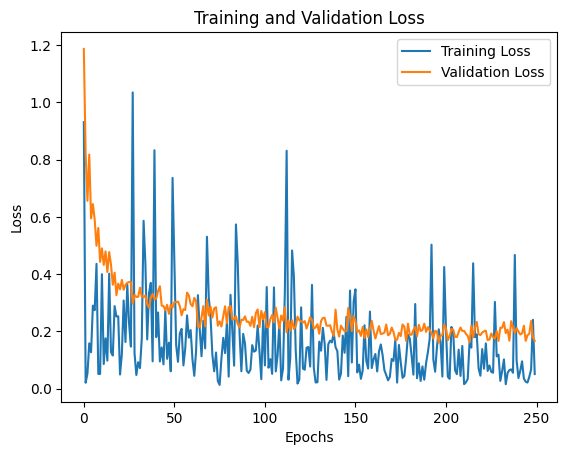

In [28]:
# regülariyasyon yöntemleri eklendi


import math
trainData = pd.read_csv('./csv/cure_the_princess_train.csv')
validData = pd.read_csv('./csv/cure_the_princess_validation.csv')
testData =  pd.read_csv('./csv/cure_the_princess_test.csv')


trainX = trainData.drop(columns=['Cured']).values
trainY = trainData['Cured'].values
validX = validData.drop(columns=['Cured']).values
validY = validData['Cured'].values
testX = testData.drop(columns=['Cured']).values
testY = testData['Cured'].values


numInputFeatures = trainX.shape[1]

torch.manual_seed(190401070)


class MLP(nn.Module):
    def __init__(self, numInputFeatures):
        super().__init__()
        self.fc1 = nn.Linear(numInputFeatures, 100) 
        nn.init.xavier_uniform_(self.fc1.weight, gain=math.sqrt(2))
        self.relu1 = nn.ReLU() 
        self.dropout1 = nn.Dropout(p=0.1) 
        self.fc2 = nn.Linear(100, 50)
        nn.init.xavier_uniform_(self.fc2.weight, gain=math.sqrt(2))
        self.relu2 = nn.ReLU() 
        self.dropout2 = nn.Dropout(p=0.1) 
        self.fc3 = nn.Linear(50, 1) 
        nn.init.xavier_uniform_(self.fc3.weight, gain=math.sqrt(2))
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


model = MLP(numInputFeatures=numInputFeatures)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0006)


numEpochs = 250
batchSize = 16
trainLosses = []
validLosses = []


for epoch in range(numEpochs):
    for i in range(0, len(trainX), batchSize):
        
        batchX = torch.tensor(trainX[i:i+batchSize], dtype=torch.float32)
        batchY = torch.tensor(trainY[i:i+batchSize], dtype=torch.float32).view(-1, 1)
        
        
        outputs = model(batchX)
        loss = criterion(outputs, batchY)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    trainLosses.append(loss.item())
    print('Epoch [%d/%d], Training Loss: %.4f' % (epoch+1, numEpochs, loss.item()))
    
   
    validLoss = criterion(model(torch.tensor(validX, dtype=torch.float32)), torch.tensor(validY, dtype=torch.float32).view(-1, 1)).item()
    validLosses.append(validLoss)
    print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, numEpochs, validLoss))


    with torch.no_grad():
        testOutputs = model(torch.tensor(testX, dtype=torch.float32))
        testPredictions = (testOutputs > 0.5).float().view(-1)

        
        accuracy = (testPredictions == torch.tensor(testY, dtype=torch.float32)).float().mean().item()
        precision = (testPredictions[testPredictions == 1] == torch.tensor(testY[testPredictions == 1], dtype=torch.float32)).float().mean().item()
        recall = (testPredictions[testY == 1] == torch.tensor(testY[testY == 1], dtype=torch.float32)).float().mean().item()
        f1 = 2 * precision * recall / (precision + recall)
        print('Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1: %.4f' % (accuracy, precision, recall, f1))




plt.plot(trainLosses, label='Training Loss')
plt.plot(validLosses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()